In [15]:
#import libraries
import pandas as pd
import numpy as np
import tensorflow as tf

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
169001437/1024

165040.4658203125

In [18]:
#load the dataset
from tensorflow.keras.datasets import cifar100

In [19]:
# Load training and testing data
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')

In [20]:
# Print the shape of the data
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing labels shape: (10000, 1)


In [21]:
#checking the dataset

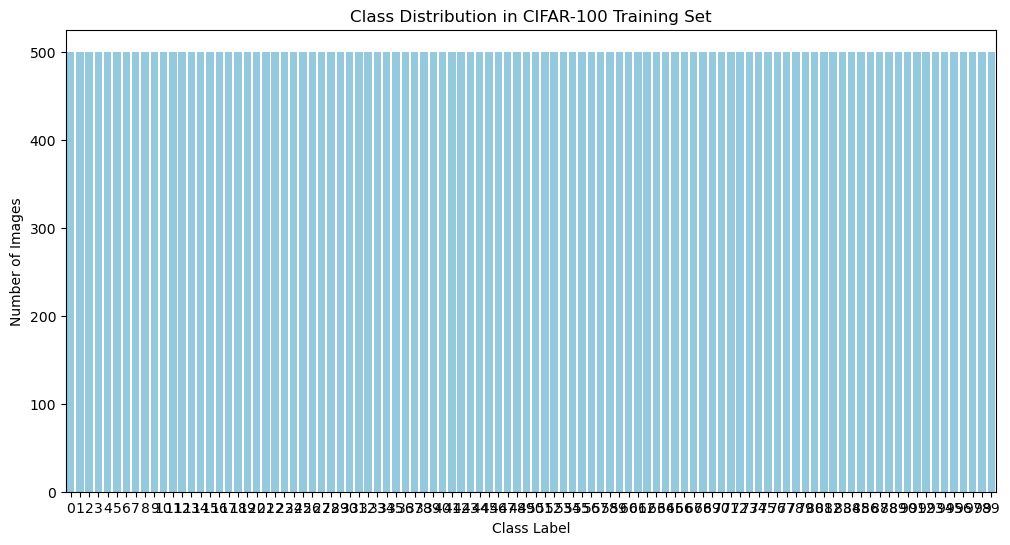

In [22]:
# Flatten the labels for easier handling
y_train_flat = y_train.flatten()
y_test_flat = y_test.flatten()

# Count the number of instances for each class in the training set
train_class_counts = np.bincount(y_train_flat, minlength=100)
test_class_counts = np.bincount(y_test_flat, minlength=100)

# Plot the class distribution for training data
plt.figure(figsize=(12, 6))
sns.barplot(x=np.arange(100), y=train_class_counts, color="skyblue")
plt.title("Class Distribution in CIFAR-100 Training Set")
plt.xlabel("Class Label")
plt.ylabel("Number of Images")
plt.show()

In [23]:
#data exploration

In [24]:
# Dataset characteristics
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Number of classes: 100


In [25]:
# Display basic statistics of the dataset
print(f"Image dimensions: {X_train.shape[1:]} (Height x Width x Channels)")
print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of test samples: {X_test.shape[0]}")

Image dimensions: (32, 32, 3) (Height x Width x Channels)
Number of training samples: 50000
Number of test samples: 10000


In [26]:
# Check distribution of labels in the training set
unique, counts = np.unique(y_train, return_counts=True)
print("Class distribution in training data:")
print(dict(zip(unique, counts)))

Class distribution in training data:
{0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500, 6: 500, 7: 500, 8: 500, 9: 500, 10: 500, 11: 500, 12: 500, 13: 500, 14: 500, 15: 500, 16: 500, 17: 500, 18: 500, 19: 500, 20: 500, 21: 500, 22: 500, 23: 500, 24: 500, 25: 500, 26: 500, 27: 500, 28: 500, 29: 500, 30: 500, 31: 500, 32: 500, 33: 500, 34: 500, 35: 500, 36: 500, 37: 500, 38: 500, 39: 500, 40: 500, 41: 500, 42: 500, 43: 500, 44: 500, 45: 500, 46: 500, 47: 500, 48: 500, 49: 500, 50: 500, 51: 500, 52: 500, 53: 500, 54: 500, 55: 500, 56: 500, 57: 500, 58: 500, 59: 500, 60: 500, 61: 500, 62: 500, 63: 500, 64: 500, 65: 500, 66: 500, 67: 500, 68: 500, 69: 500, 70: 500, 71: 500, 72: 500, 73: 500, 74: 500, 75: 500, 76: 500, 77: 500, 78: 500, 79: 500, 80: 500, 81: 500, 82: 500, 83: 500, 84: 500, 85: 500, 86: 500, 87: 500, 88: 500, 89: 500, 90: 500, 91: 500, 92: 500, 93: 500, 94: 500, 95: 500, 96: 500, 97: 500, 98: 500, 99: 500}


In [27]:
#normalization

In [28]:
# Normalize pixel values to [0, 1]
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [29]:
#data augmentation

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation techniques
datagen = ImageDataGenerator(
    rotation_range=15,   # Rotate images up to 15 degrees
    width_shift_range=0.1,  # Shift width by up to 10%
    height_shift_range=0.1,  # Shift height by up to 10%
    horizontal_flip=True,    # Randomly flip images horizontally
)

# Fit the data generator on the training data
datagen.fit(X_train)

In [31]:
datagen

In [32]:
#visualising sample images from the classes available

In [33]:
import matplotlib.pyplot as plt

# Load class labels for CIFAR-100
from tensorflow.keras.datasets.cifar100 import load_data
_, (train_labels, test_labels) = load_data(label_mode="fine")
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]



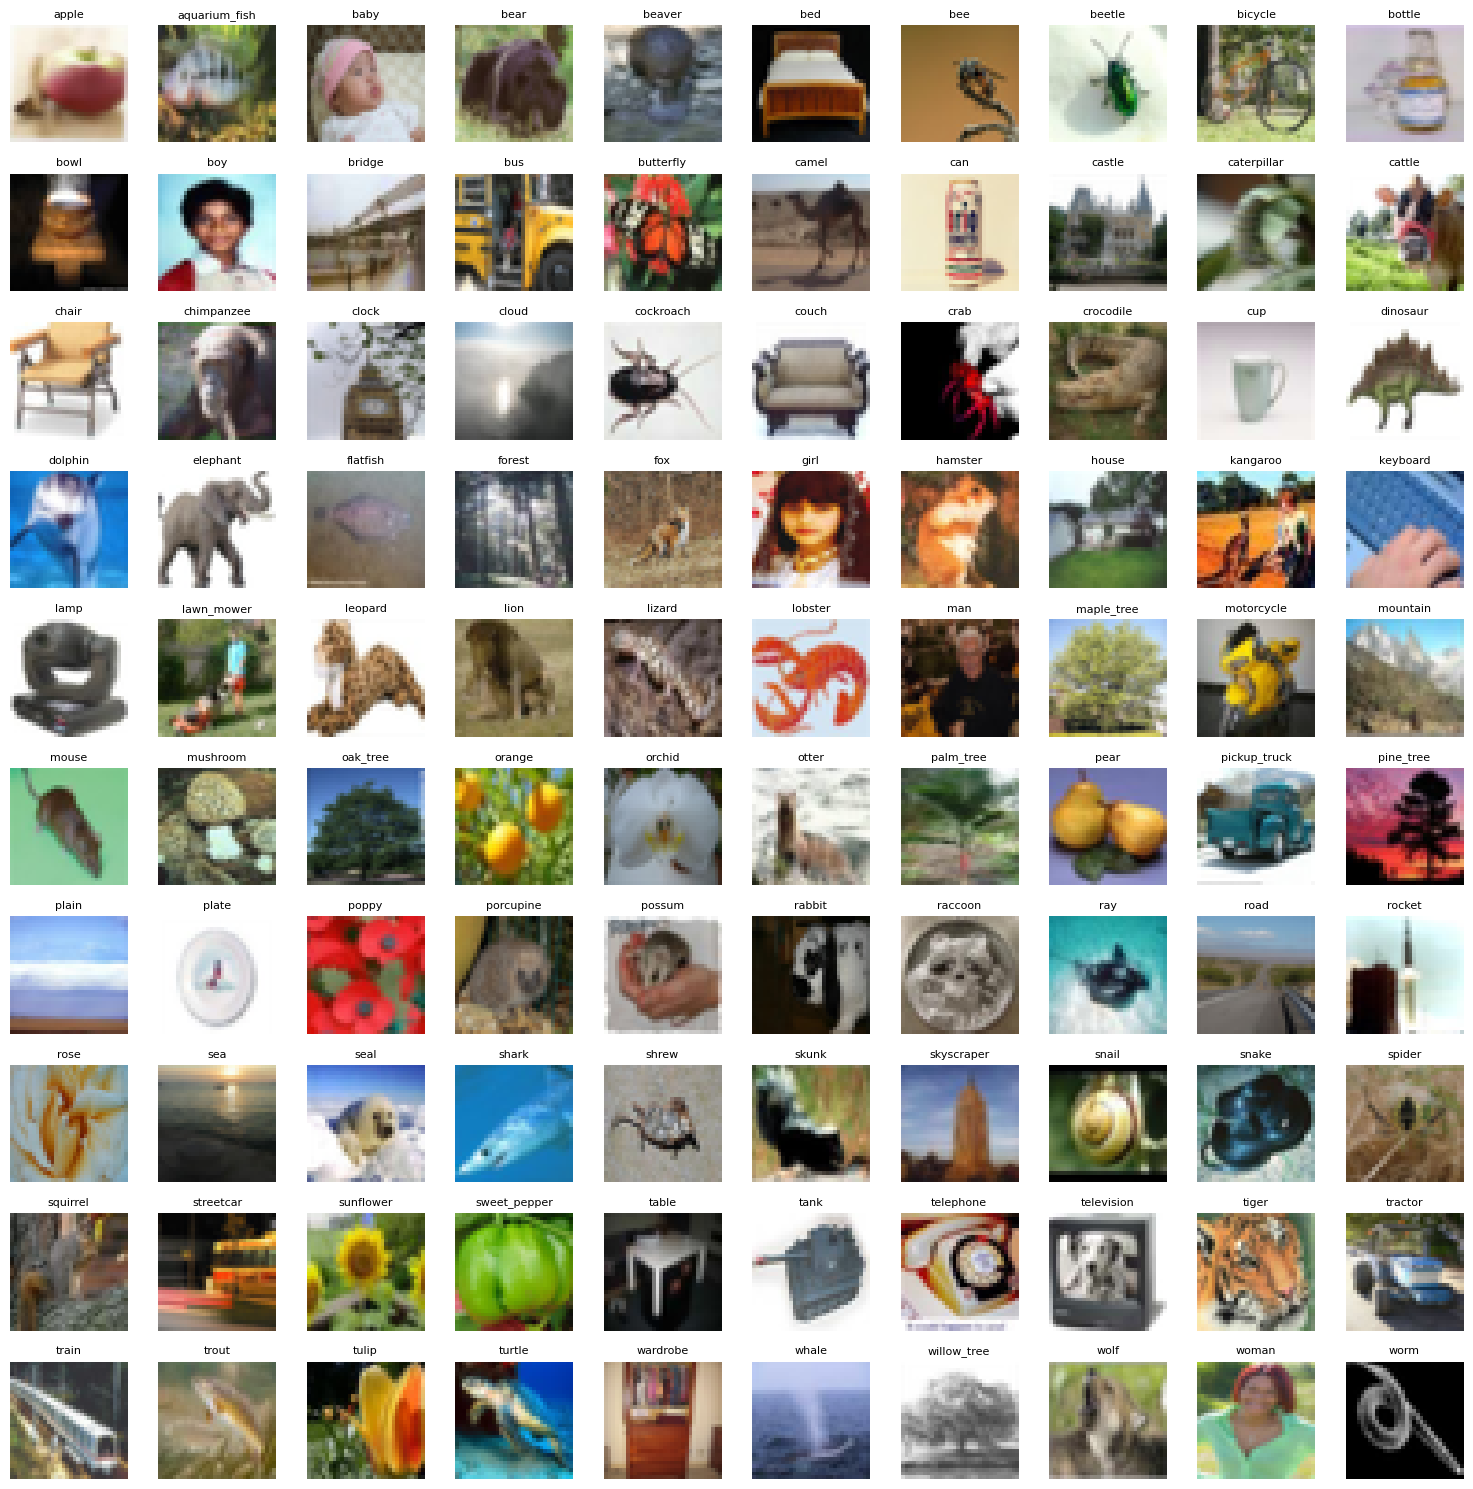

In [34]:
# Visualize 10 random images from different classes
fig, axes = plt.subplots(10, 10, figsize=(15, 15))
for i, ax in enumerate(axes.flat):
    idx = np.where(y_train == i)[0][0]
    ax.imshow(X_train[idx])
    ax.set_title(class_names[i], fontsize=8)
    ax.axis('off')
plt.tight_layout()
plt.show()


In [35]:
290000*12

3480000

In [36]:
600000*12

7200000